Consider a current $I$ flowing counterclockwise in a circle in the xy-plane. Parameterise this loop in terms of t:
$$ x = cos(t), y = sin(t), z = z_0$$ 


where $0 \leq t \leq 2\pi$ and $z_0$ is the position of the circle in the z axis. The Biot-Savard Law tells us

$$\vec{B}(\vec{r}) =  \frac{\mu_0 I}{4 \pi} \int_C \frac{d\vec{l} \times (\vec{r}-\vec{l})}{|\vec{r}-\vec{l}|^3} = \int_0^{2 \pi} \frac{d\vec{l}/dt \times (\vec{r} - \vec{l})}{|\vec{r}-\vec{l}|^3} dt$$

Putting this in dimensionless form 

* $\vec{l} \to \vec{l}/R$
* $\vec{r} \to \vec{r}/R$

we get

$$\frac{4 \pi R}{\mu_0 I} \vec{B}(\vec{r}) = \int_0^{2 \pi} \frac{d\vec{l}/dt \times (\vec{r} - \vec{l})}{|\vec{r}-\vec{l}|^3} dt$$

So basically the value of $B$ we get here is actually scaled in terms of the other constant. If we want to compare with the magnet mapper then we can mutiply by reciprocal of the constants on the LHS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import plotly.graph_objects as go
from IPython.display import HTML
import sympy as smp
from sympy.vector import cross


Start by looking at curve

In [2]:
phi = np.linspace(0, 2*np.pi, 100)

def l(phi):
    return np.array([np.cos(phi), np.sin(phi), np.zeros(len(phi))+0.5])

'''
def l(phi):
    return np.array([np.cos(phi), np.sin(phi), (phi-np.pi)/np.pi])
    '''

'\ndef l(phi):\n    return np.array([np.cos(phi), np.sin(phi), (phi-np.pi)/np.pi])\n    '

In [3]:
lx, ly, lz = l(phi)

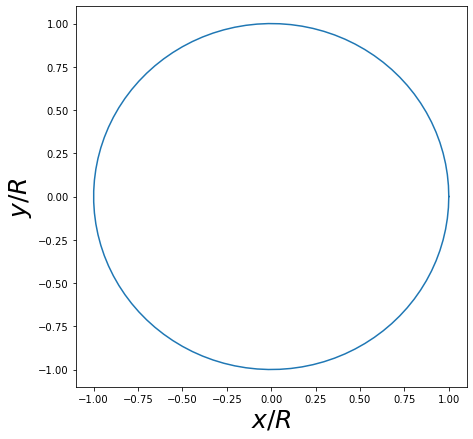

In [4]:
plt.figure(figsize=(7,7))
plt.plot(lx, ly)
plt.xlabel('$x/R$', fontsize=25)
plt.ylabel('$y/R$', fontsize=25)
plt.show()

Lets solve for the integrand using sympy

In [5]:
t, x, y, z = smp.symbols('t, x, y, z') #x,y,z are the x y z of the position vector

Get $l$, $r$, and the seperation vector $\vec{r} - \vec{l}$ for each coil (at z = ±0.5R)

In [6]:
l = smp.Matrix([smp.cos(t), smp.sin(t), 0.5]) #symbolic 
#l = smp.Matrix([smp.cos(t), smp.sin(t), (t-smp.pi)/smp.pi])
r = smp.Matrix([x, y, z])
sep = r-l #separation vector

In [7]:
r-l

Matrix([
[x - cos(t)],
[y - sin(t)],
[   z - 0.5]])

Coil 2

In [8]:
l_2 = smp.Matrix([smp.cos(t), smp.sin(t), -0.5]) #symbolic 
sep_2 = r-l_2 #separation vector

In [9]:
r-l_2

Matrix([
[x - cos(t)],
[y - sin(t)],
[   z + 0.5]])

Other coils (close together)

In [10]:
l_3 = smp.Matrix([smp.cos(t), smp.sin(t), 0.508]) #symbolic 
sep_3 = r-l_3 #separation vector

In [11]:
l_4 = smp.Matrix([smp.cos(t), smp.sin(t), -0.508]) #symbolic 
sep_4 = r-l_4 #separation vector

Define the integrand for each coil

In [12]:
integrand = smp.diff(l, t).cross(sep) / sep.norm()**3

In [13]:
integrand_2 =  smp.diff(l_2, t).cross(sep_2) / sep_2.norm()**3

In [14]:
integrand_3 =  smp.diff(l_3, t).cross(sep_3) / sep_3.norm()**3

In [15]:
integrand_4 =  smp.diff(l_4, t).cross(sep_4) / sep_4.norm()**3

Get the $x$, $y$, and $z$ components of the integrand for each coil

In [16]:
dBxdt = smp.lambdify([t, x, y, z], integrand[0]) #integrand[0] = x component
dBydt = smp.lambdify([t, x, y, z], integrand[1])
dBzdt = smp.lambdify([t, x, y, z], integrand[2])

In [17]:
dBxdt_2 = smp.lambdify([t, x, y, z], integrand_2[0]) #integrand[0] = x component
dBydt_2 = smp.lambdify([t, x, y, z], integrand_2[1])
dBzdt_2 = smp.lambdify([t, x, y, z], integrand_2[2])

In [18]:
dBxdt_3 = smp.lambdify([t, x, y, z], integrand_3[0]) #integrand[0] = x component
dBydt_3 = smp.lambdify([t, x, y, z], integrand_3[1])
dBzdt_3 = smp.lambdify([t, x, y, z], integrand_3[2])

In [19]:
dBxdt_4 = smp.lambdify([t, x, y, z], integrand_4[0]) #integrand[0] = x component
dBydt_4 = smp.lambdify([t, x, y, z], integrand_4[1])
dBzdt_4 = smp.lambdify([t, x, y, z], integrand_4[2])

Get the magnetic field by performing the integral over each component for each coil

In [20]:
def B(x, y, z):
    return np.array([quad(dBxdt, 0, 2*np.pi, args=(x, y, z))[0],
                     quad(dBydt, 0, 2*np.pi, args=(x, y, z))[0],
                     quad(dBzdt, 0, 2*np.pi, args=(x, y, z))[0]]) #[0] is the integral, [1] is uncer

#need to add up contribution due to all different t 

In [21]:
def B_2(x, y, z):
    return np.array([quad(dBxdt_2, 0, 2*np.pi, args=(x, y, z))[0],
                     quad(dBydt_2, 0, 2*np.pi, args=(x, y, z))[0],
                     quad(dBzdt_2, 0, 2*np.pi, args=(x, y, z))[0]]) #[0] is the integral, [1] is uncer


In [22]:
def B_3(x, y, z):
    return np.array([quad(dBxdt_3, 0, 2*np.pi, args=(x, y, z))[0],
                     quad(dBydt_3, 0, 2*np.pi, args=(x, y, z))[0],
                     quad(dBzdt_3, 0, 2*np.pi, args=(x, y, z))[0]]) #[0] is the integral, [1] is uncer


In [23]:
def B_4(x, y, z):
    return np.array([quad(dBxdt_4, 0, 2*np.pi, args=(x, y, z))[0],
                     quad(dBydt_4, 0, 2*np.pi, args=(x, y, z))[0],
                     quad(dBzdt_4, 0, 2*np.pi, args=(x, y, z))[0]]) #[0] is the integral, [1] is uncer


# Plotting B_z vs z for x=y=0. Make more coils using the same method above then use superposition. Since coils are tightly packed, we can just mutiply it by the number of turns.

In [24]:
#scaling for unit here. Mutiply magnetic field by scale to obtain value in tesla 
u_0 = 4*np.pi*10**(-7)
I = 1
R = 12.5/1000
scale =u_0*I/(4*np.pi*R)


Text(0.5, 1.0, 'I = 1 A, radius = 12.5 mm, 14 turns each side')

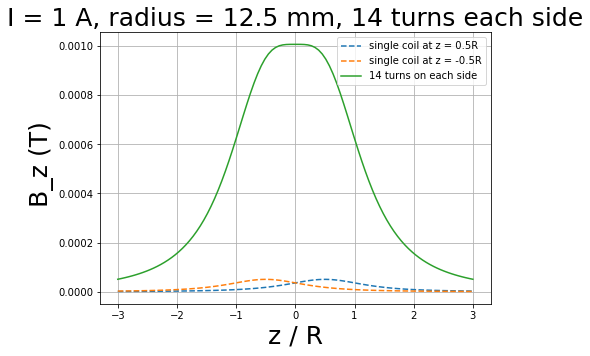

In [25]:
z_coordinate=np.linspace(-3,3,100)
magnetic_field_1 =[] #we will append to this empty list
magnetic_field_2=[]
magnetic_field_3=[]
magnetic_field_4=[]

for i in range(len(z_coordinate)):
    magnetic_field_1.append(B(0,0,z_coordinate[i])[2]*scale)
    magnetic_field_2.append(B_2(0,0,z_coordinate[i])[2]*scale)
    magnetic_field_3.append(B_3(0,0,z_coordinate[i])[2]*scale)
    magnetic_field_4.append(B_4(0,0,z_coordinate[i])[2]*scale)



plt.figure(figsize=(7,5))
plt.plot(z_coordinate,magnetic_field_1,label='single coil at z = 0.5R',linestyle='dashed')
plt.plot(z_coordinate,magnetic_field_2,label='single coil at z = -0.5R',linestyle='dashed')
#plt.plot(z_coordinate,magnetic_field_3,label='coil centered at z = 0.505R',linestyle='dashed')
#plt.plot(z_coordinate,magnetic_field_4,label='coil centered at z = -0.505R',linestyle='dashed')



magnetic_field_net_1=[]
magnetic_field_net_2=[]

for j in range(len(magnetic_field_1)):
    magnetic_field_net_1.append((magnetic_field_1[j]+magnetic_field_2[j])*14)
    #magnetic_field_net_2.append(magnetic_field_1[j]+magnetic_field_2[j]+magnetic_field_3[j]+magnetic_field_4[j])


plt.plot(z_coordinate,magnetic_field_net_1,label='14 turns on each side')
#plt.plot(z_coordinate,magnetic_field_net_2,label='4 coils. each side slightly separated')

#superposition 
plt.xlabel('z / R',fontsize=25)
plt.ylabel(' B_z (T)',fontsize=25)
plt.grid()
plt.legend()
plt.title('I = 1 A, radius = 12.5 mm, 14 turns each side',fontsize=25)

# Define the function to calculate field strength

In [26]:
def field_strength(B_x,B_y,B_z):
    return np.sqrt(B_x**2+B_y**2+B_z**2)




In [27]:
x = np.linspace(-1, 1, 20) 
xv, yv= np.meshgrid(x, x) 


# Obtaining the component of the field and finding the field strength on z =0

To change which plane you want to look at, change the '0' to whatever number you want in args part of the next cell

In [28]:
#Defining the integral for each plane 
def B_zplane(x,y):
    return np.array([quad(dBxdt, 0, 2*np.pi, args=(x, y, 0))[0],
                     quad(dBydt, 0, 2*np.pi, args=(x, y, 0))[0],
                     quad(dBzdt, 0, 2*np.pi, args=(x, y, 0))[0]]) #for example change 0 --> 1 for z = 1

def B_zplane_2(x,y):
    return np.array([quad(dBxdt_2, 0, 2*np.pi, args=(x, y, 0))[0],
                     quad(dBydt_2, 0, 2*np.pi, args=(x, y, 0))[0],
                     quad(dBzdt_2, 0, 2*np.pi, args=(x, y, 0))[0]]) #same here

In [32]:
B_field = np.vectorize(B_zplane, signature='(),()->(n)')(xv, yv)
B_field_2 = np.vectorize(B_zplane_2, signature='(),()->(n)')(xv, yv)

Bx =(B_field[:,:,0]+B_field_2[:,:,0])*scale 
By = (B_field[:,:,1]+B_field_2[:,:,1])*scale
Bz = (B_field[:,:,2]+B_field_2[:,:,2])*scale
field_magnitude = field_strength(Bx,By,Bz) #unit in tesla
print(field_magnitude)

[[5.79516267e-06 3.80244079e-06 7.27249179e-07 3.41648062e-06
  8.36193975e-06 1.36129848e-05 1.85741234e-05 2.27095494e-05
  2.56396520e-05 2.71496046e-05 2.71496046e-05 2.56396520e-05
  2.27095494e-05 1.85741234e-05 1.36129848e-05 8.36193975e-06
  3.41648062e-06 7.27249179e-07 3.80244079e-06 5.79516267e-06]
 [3.80244079e-06 2.28836409e-07 4.90920212e-06 1.13848929e-05
  1.85741234e-05 2.56396520e-05 3.18230524e-05 3.66365163e-05
  3.98690908e-05 4.14792621e-05 4.14792621e-05 3.98690908e-05
  3.66365163e-05 3.18230524e-05 2.56396520e-05 1.85741234e-05
  1.13848929e-05 4.90920212e-06 2.28836409e-07 3.80244079e-06]
 [7.27249179e-07 4.90920212e-06 1.24775919e-05 2.12943924e-05
  3.02446508e-05 3.82533434e-05 4.46647318e-05 4.92887070e-05
  5.22190776e-05 5.36269847e-05 5.36269847e-05 5.22190776e-05
  4.92887070e-05 4.46647318e-05 3.82533434e-05 3.02446508e-05
  2.12943924e-05 1.24775919e-05 4.90920212e-06 7.27249179e-07]
 [3.41648062e-06 1.13848929e-05 2.12943924e-05 3.18230524e-05
  4.1

# Contour plot using matplotlib

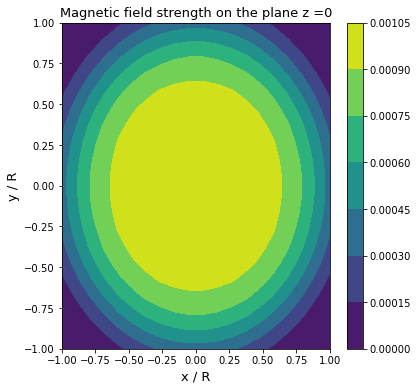

In [37]:
from matplotlib import ticker, cm
fig, ax = plt.subplots(figsize=(6,6))
cs = ax.contourf(xv, yv, field_magnitude*14) #14 turns each side
cbar = fig.colorbar(cs)

plt.xlabel('x / R',fontsize=13)
plt.ylabel('y / R',fontsize=13)
plt.title('Magnetic field strength on the plane z =0',fontsize=13)
plt.savefig('1.png',dpi=500)

#so 1000 A from the disc